In [ ]:
# ============================================
# AMAZON ELECTRONICS SALES ANALYSIS PROJECT
# Focus: Price & Discount Strategy Analysis
# ============================================

# Step 1️: Import libraries
# These are standard Python libraries used for data analysis and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner and larger
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10,5)

# Step 2️: Load the dataset
# Make sure your CSV file is in the same folder as your Jupyter Notebook
# You can change the path if it's saved elsewhere
df = pd.read_csv('amazon_products_sales_data_cleaned.csv')

# Step 3️: Quick look at the data
# Check the first few rows to understand what columns we have
df.head()


,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,2025-09-01,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones,43.60
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,2025-08-29,NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,37.52
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000.0,314.00,349.00,No Badge,Sponsored,No Coupon,Add to cart,2025-09-01,NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,10.03
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000.0,162.24,162.24,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,https://www.amazon.com/Apple-Cancellation-Tran...,2025-08-21 11:14:29,Phones,0.00
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000.0,72.74,72.74,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,https://www.amazon.com/Apple-MX542LL-A-AirTag-...,2025-08-21 11:14:29,Phones,0.00


In [ ]:
# ============================================
#  STEP 2: QUICK DATA QUALITY CHECK
# ============================================

# 1️ Check general info
df.info()

# 2️ Check if there are any missing values
df.isna().sum()

# 3️ Check for duplicates
df.duplicated().sum()

# 4️ Verify numeric columns are properly typed
df[['discounted_price', 'original_price', 'discount_percentage']].head()

# 5️ Make sure date columns are datetime
df['delivery_date'] = pd.to_datetime(df['delivery_date'], errors='coerce')
df['data_collected_at'] = pd.to_datetime(df['data_collected_at'], errors='coerce')

# 6️ Quick descriptive summary (helps understand data scale)
df.describe(include='all').T.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_title         42675 non-null  object 
 1   product_rating        41651 non-null  float64
 2   total_reviews         41651 non-null  float64
 3   purchased_last_month  32164 non-null  float64
 4   discounted_price      40613 non-null  float64
 5   original_price        40613 non-null  float64
 6   is_best_seller        42675 non-null  object 
 7   is_sponsored          42675 non-null  object 
 8   has_coupon            42675 non-null  object 
 9   buy_box_availability  28022 non-null  object 
 10  delivery_date         30692 non-null  object 
 11  sustainability_tags   3408 non-null   object 
 12  product_image_url     42675 non-null  object 
 13  product_page_url      40606 non-null  object 
 14  data_collected_at     42675 non-null  object 
 15  product_category   

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
product_title,42675,8808,"Duracell Coppertop 9V Battery, 6 Count (Pack o...",744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_rating,41651.0,NaN,NaN,NaN,4.399431,1.0,4.2,4.5,4.7,5.0,0.386997
total_reviews,41651.0,NaN,NaN,NaN,3087.106,1.0,82.0,343.0,1886.0,865598.0,13030.460133
purchased_last_month,32164.0,NaN,NaN,NaN,1293.665278,50.0,100.0,200.0,400.0,100000.0,6318.323574
discounted_price,40613.0,NaN,NaN,NaN,243.227289,2.16,29.69,84.99,224.0,5449.0,473.351545
original_price,40613.0,NaN,NaN,NaN,257.611107,2.16,32.99,89.0,229.99,5449.0,496.633495
is_best_seller,42675,12,No Badge,40814,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_sponsored,42675,2,Organic,35664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_coupon,42675,42,No Coupon,40727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buy_box_availability,28022,1,Add to cart,28022,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# ============================================
# STEP 3: FINAL PREPARATION BEFORE ANALYSIS
# ============================================

# 1️ Fill missing numeric values with 0 (means "no data / no sales")
num_cols = ['product_rating', 'total_reviews', 'purchased_last_month',
             'discounted_price', 'original_price', 'discount_percentage']
df[num_cols] = df[num_cols].fillna(0)

# 2️ Simplify boolean-like columns (convert to 1/0)
df['is_best_seller'] = df['is_best_seller'].apply(lambda x: 1 if x != 'No Badge' else 0)
df['is_sponsored'] = df['is_sponsored'].apply(lambda x: 1 if x == 'Sponsored' else 0)
df['has_coupon'] = df['has_coupon'].apply(lambda x: 1 if x != 'No Coupon' else 0)

# 3️ Drop columns not needed for our analysis (URLs, tags, etc.)
drop_cols = ['product_image_url', 'product_page_url', 'sustainability_tags', 'buy_box_availability']
df = df.drop(columns=drop_cols, errors='ignore')

# 4️ Quick check that everything looks good now
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   product_title         42675 non-null  object        
 1   product_rating        42675 non-null  float64       
 2   total_reviews         42675 non-null  float64       
 3   purchased_last_month  42675 non-null  float64       
 4   discounted_price      42675 non-null  float64       
 5   original_price        42675 non-null  float64       
 6   is_best_seller        42675 non-null  int64         
 7   is_sponsored          42675 non-null  int64         
 8   has_coupon            42675 non-null  int64         
 9   delivery_date         30692 non-null  datetime64[ns]
 10  data_collected_at     42675 non-null  datetime64[ns]
 11  product_category      42675 non-null  object        
 12  discount_percentage   42675 non-null  float64       
dtypes: datetime64[ns

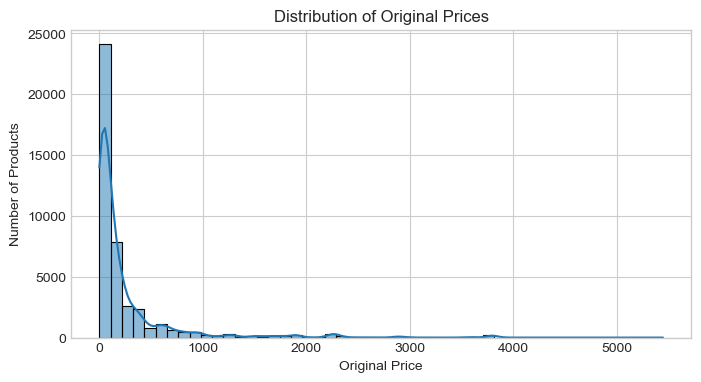

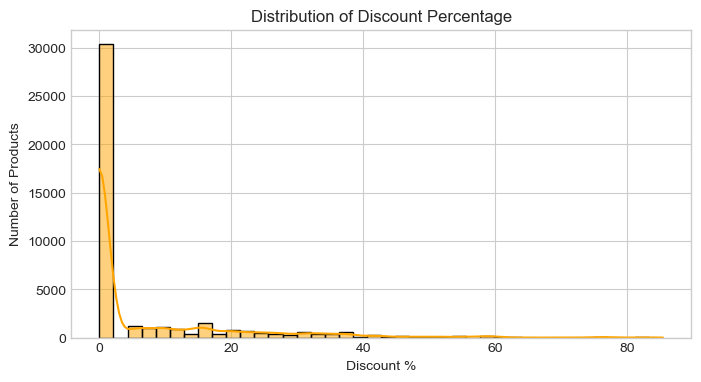

,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,delivery_date,data_collected_at,product_category,discount_percentage


In [6]:
# ============================================
# 📊 STEP 4.1: PRICE AND DISCOUNT OVERVIEW
# ============================================

# 1️ Look at the general statistics of price-related columns
df[['original_price', 'discounted_price', 'discount_percentage']].describe()

# 2️ Visualize price distribution
plt.figure(figsize=(8,4))
sns.histplot(df['original_price'], bins=50, kde=True)
plt.title('Distribution of Original Prices')
plt.xlabel('Original Price')
plt.ylabel('Number of Products')
plt.show()

# 3️ Visualize discount distribution
plt.figure(figsize=(8,4))
sns.histplot(df['discount_percentage'], bins=40, kde=True, color='orange')
plt.title('Distribution of Discount Percentage')
plt.xlabel('Discount %')
plt.ylabel('Number of Products')
plt.show()

# 4️ Check if there are any products with unrealistic discounts
# (for example, >90% might be data errors)
df[df['discount_percentage'] > 90].head()


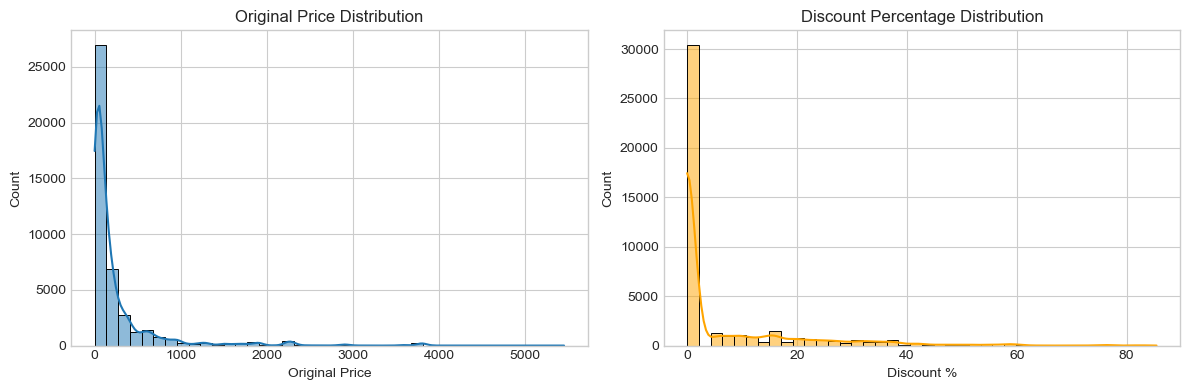

In [7]:
# OPTIONAL - cleaner layout
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(df['original_price'], bins=40, kde=True, ax=axes[0])
axes[0].set_title('Original Price Distribution')
axes[0].set_xlabel('Original Price')

sns.histplot(df['discount_percentage'], bins=40, kde=True, color='orange', ax=axes[1])
axes[1].set_title('Discount Percentage Distribution')
axes[1].set_xlabel('Discount %')

plt.tight_layout()
plt.show()


Interpretation 

Most products are priced under CHF 500, with a small number of expensive items reaching up to CHF 5,000+.

The discount percentage distribution is heavily skewed, most discounts are below 20%, with very few extreme discounts (>70%).

This suggests that Amazon’s electronics market mostly competes on small discounts and price optimization, not huge markdowns.

Correlation between Discount % and Purchases Last Month: 0.06


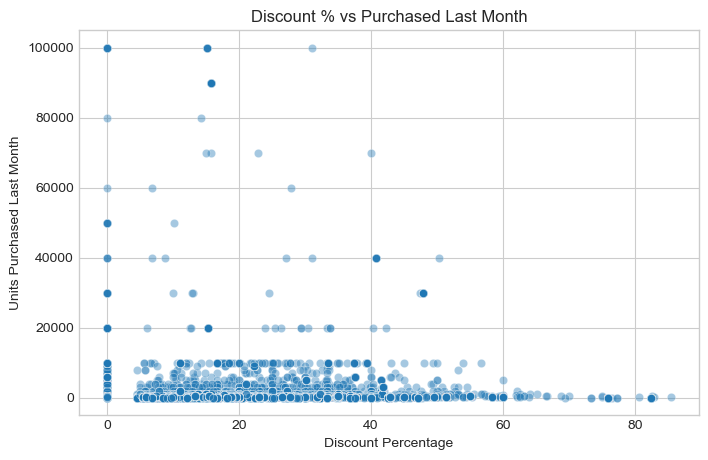

C:\Users\taouf\AppData\Local\Temp\ipykernel_23320\2980347487.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_sales = df.groupby('discount_group')['purchased_last_month'].mean().reset_index()


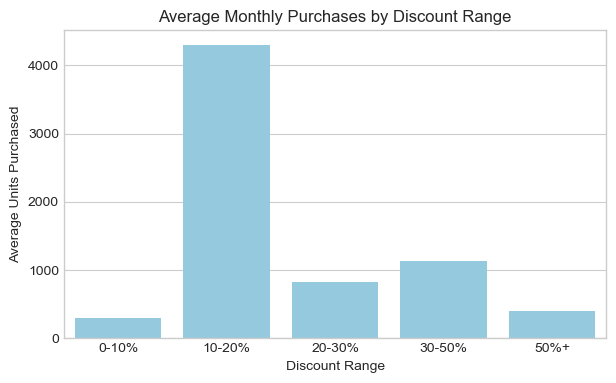

,discount_group,purchased_last_month
0,0-10%,295.191364
1,10-20%,4300.442702
2,20-30%,819.049794
3,30-50%,1128.164948
4,50%+,403.711790


In [ ]:
# ============================================
# STEP 4.2: RELATIONSHIP BETWEEN DISCOUNT AND SALES
# ============================================

# 1️ Quick numeric check
# Correlation tells us how strongly two variables move together (values between -1 and 1)
corr = df['discount_percentage'].corr(df['purchased_last_month'])
print("Correlation between Discount % and Purchases Last Month:", round(corr, 3))

# 2️ Scatterplot: discount vs purchases
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='discount_percentage', y='purchased_last_month', alpha=0.4)
plt.title('Discount % vs Purchased Last Month')
plt.xlabel('Discount Percentage')
plt.ylabel('Units Purchased Last Month')
plt.show()

# 3️ Optional: group discounts into ranges to make trend clearer
# This helps summarize purchase averages for small, medium, large discounts
bins = [0, 10, 20, 30, 50, 100]
labels = ['0-10%', '10-20%', '20-30%', '30-50%', '50%+']
df['discount_group'] = pd.cut(df['discount_percentage'], bins=bins, labels=labels)

# Calculate average purchases per discount group
discount_sales = df.groupby('discount_group')['purchased_last_month'].mean().reset_index()

# 4️ Bar chart to visualize it
plt.figure(figsize=(7,4))
sns.barplot(data=discount_sales, x='discount_group', y='purchased_last_month', color='skyblue')
plt.title('Average Monthly Purchases by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Average Units Purchased')
plt.show()

# 5️ Display the summarized table
discount_sales


Business Conclusion:

“From this analysis, we can see that moderate discounts (10–20%) lead to the highest average monthly sales. Deep discounts above 30% don’t necessarily improve performance, they may apply to slow-moving or clearance products. So, a data-driven pricing strategy should focus on maintaining moderate, attractive discounts rather than extreme markdowns.”

Average purchases (with/without coupon):
   has_coupon  purchased_last_month
0   No Coupon           1000.840965
1  Has Coupon            435.420945


C:\Users\taouf\AppData\Local\Temp\ipykernel_23320\3857714431.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coupon_sales, x='has_coupon', y='purchased_last_month', palette='viridis')


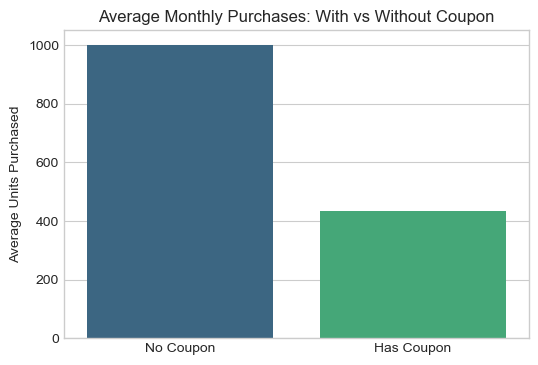

Average purchases (Best Seller vs Normal):

C:\Users\taouf\AppData\Local\Temp\ipykernel_23320\3857714431.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bestseller_sales, x='is_best_seller', y='purchased_last_month', palette='mako')



   is_best_seller  purchased_last_month
0  Normal Product            816.874112
1     Best Seller           4443.605588


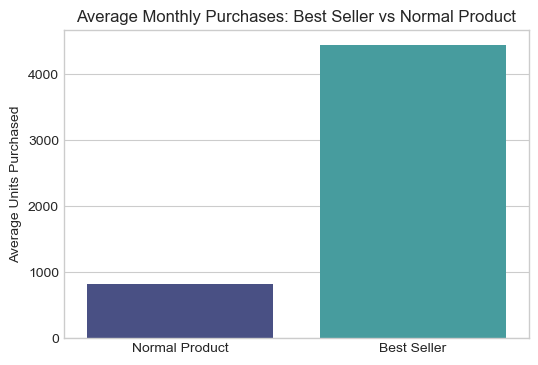

In [9]:
# ============================================
#  STEP 4.3: COUPONS & BEST SELLER EFFECT ON SALES
# ============================================

# 1️ Compare average sales for products with vs without a coupon
coupon_sales = df.groupby('has_coupon')['purchased_last_month'].mean().reset_index()
coupon_sales['has_coupon'] = coupon_sales['has_coupon'].map({0: 'No Coupon', 1: 'Has Coupon'})
print("Average purchases (with/without coupon):")
print(coupon_sales)

# Bar chart for coupon effect
plt.figure(figsize=(6,4))
sns.barplot(data=coupon_sales, x='has_coupon', y='purchased_last_month', palette='viridis')
plt.title('Average Monthly Purchases: With vs Without Coupon')
plt.xlabel('')
plt.ylabel('Average Units Purchased')
plt.show()


# 2️ Compare average sales for Best Sellers vs normal products
bestseller_sales = df.groupby('is_best_seller')['purchased_last_month'].mean().reset_index()
bestseller_sales['is_best_seller'] = bestseller_sales['is_best_seller'].map({0: 'Normal Product', 1: 'Best Seller'})
print("Average purchases (Best Seller vs Normal):")
print(bestseller_sales)

# Bar chart for Best Seller effect
plt.figure(figsize=(6,4))
sns.barplot(data=bestseller_sales, x='is_best_seller', y='purchased_last_month', palette='mako')
plt.title('Average Monthly Purchases: Best Seller vs Normal Product')
plt.xlabel('')
plt.ylabel('Average Units Purchased')
plt.show()


Surprisingly, products without coupons sell more than those with coupons.
This could mean that:

Coupons are used more for low-demand or new products.

Customers might already prefer trusted or popular products instead of chasing small coupons.

Coupons alone don’t guarantee higher sales, they might need to be combined with a good product reputation or rating.

Business takeaway:

Coupons are not the main driver of purchases in this dataset. They could work better when paired with high visibility or popular products.

Here, we see a huge difference, Best Sellers sell more than 5× as much as normal products.
This shows the strong influence of social proof: customers trust what’s already selling well.
Best Seller tags create confidence and drive higher conversions.

Business takeaway:

Featuring top products as “Best Sellers” or “Top Picks” could significantly boost sales, even without big discounts or coupons.
For amazon, highlighting “customer favorite” products might be a more efficient sales tactic than just lowering prices.

Number of product categories: 15


C:\Users\taouf\AppData\Local\Temp\ipykernel_23320\3517738474.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_sales, x='purchased_last_month', y='product_category', palette='Blues_r')


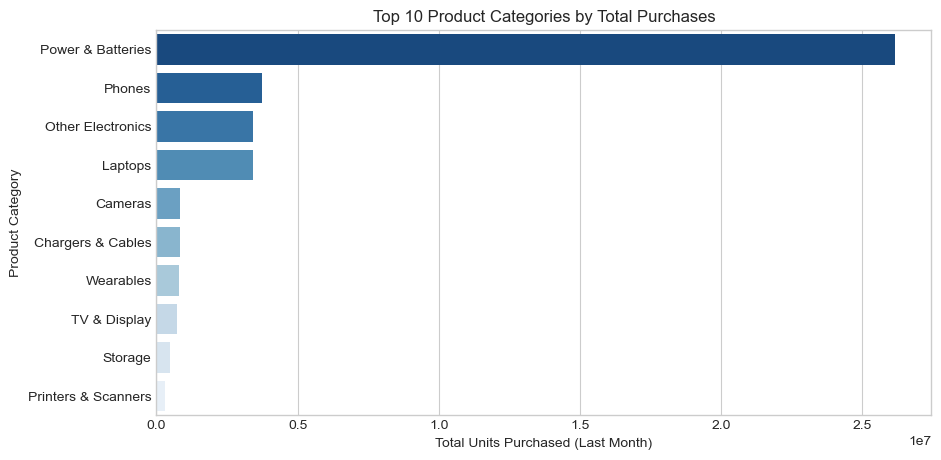

C:\Users\taouf\AppData\Local\Temp\ipykernel_23320\3517738474.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_ratings, x='product_rating', y='product_category', palette='Greens_r')


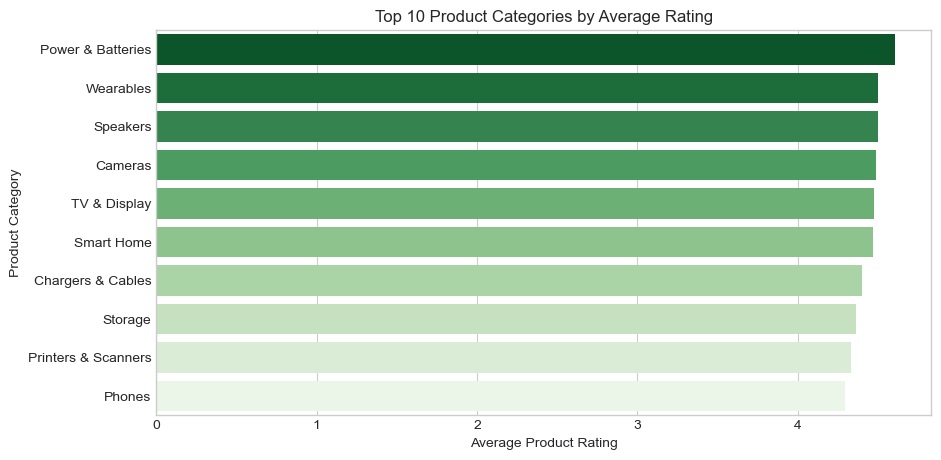

,product_category,purchased_last_month,product_rating
8,Power & Batteries,26151450.0,4.604414
7,Phones,3729550.0,4.294423
6,Other Electronics,3425800.0,4.292690
4,Laptops,3416450.0,4.045726
0,Cameras,835300.0,4.491569
1,Chargers & Cables,822150.0,4.403492
14,Wearables,785450.0,4.501322
13,TV & Display,715750.0,4.473346
12,Storage,493650.0,4.360982
9,Printers & Scanners,290250.0,4.333067


In [ ]:
# ============================================
#  STEP 4.4: CATEGORY-LEVEL INSIGHTS
# ============================================

# 1️ Check how many unique categories we have
print("Number of product categories:", df['product_category'].nunique())

# 2️ Top categories by total purchases
top_sales = (
    df.groupby('product_category')['purchased_last_month']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# 3️ Top categories by average rating
top_ratings = (
    df.groupby('product_category')['product_rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# 4️ Plot: Top 10 categories by total purchases
plt.figure(figsize=(10,5))
sns.barplot(data=top_sales, x='purchased_last_month', y='product_category', palette='Blues_r')
plt.title('Top 10 Product Categories by Total Purchases')
plt.xlabel('Total Units Purchased (Last Month)')
plt.ylabel('Product Category')
plt.show()

# 5️ Plot: Top 10 categories by average rating
plt.figure(figsize=(10,5))
sns.barplot(data=top_ratings, x='product_rating', y='product_category', palette='Greens_r')
plt.title('Top 10 Product Categories by Average Rating')
plt.xlabel('Average Product Rating')
plt.ylabel('Product Category')
plt.show()

# 6️ Optional: Merge both to see categories that are both popular and well-rated
category_summary = (
    df.groupby('product_category')[['purchased_last_month', 'product_rating']]
    .agg({'purchased_last_month': 'sum', 'product_rating': 'mean'})
    .reset_index()
    .sort_values(by='purchased_last_month', ascending=False)
)
category_summary.head(10)


“From the category-level analysis, we can see that Power & Batteries dominate total sales, likely because they’re low-cost essentials. Phones and Laptops also perform strongly in sales volume.
However, Wearables and Speakers stand out for customer satisfaction — they have the highest ratings but relatively lower sales.
This suggests a great opportunity: amazon could increase visibility or bundle promotions for these high-rated categories to convert customer satisfaction into more sales.”

Mean Absolute Error: 253.09
R² Score: 0.902
               Feature  Importance
4        total_reviews    0.876458
2  discount_percentage    0.031050
0     discounted_price    0.026690
1       original_price    0.026194
3       product_rating    0.021633
5       is_best_seller    0.011645
7         is_sponsored    0.006079
6           has_coupon    0.000251


C:\Users\taouf\AppData\Local\Temp\ipykernel_23320\3941021965.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances, x='Importance', y='Feature', palette='viridis')


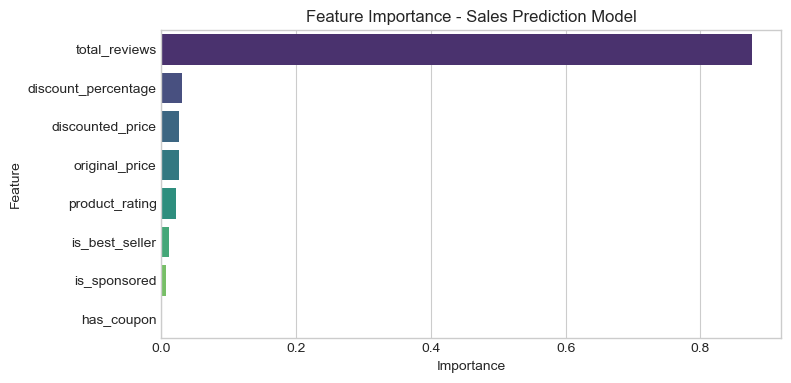

In [11]:
# ============================================
# STEP 5: SIMPLE SALES PREDICTION MODEL
# Goal: Predict 'purchased_last_month' using price, rating, and discount
# ============================================

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1️ Select relevant features
features = ['discounted_price', 'original_price', 'discount_percentage',
            'product_rating', 'total_reviews', 'is_best_seller', 'has_coupon', 'is_sponsored']

# Drop rows with missing target
df_model = df.dropna(subset=['purchased_last_month'])

X = df_model[features]
y = df_model['purchased_last_month']

# 2️ Split data into train and test sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️ Train a simple Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4️ Make predictions
y_pred = model.predict(X_test)

# 5️ Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", round(mae, 2))
print("R² Score:", round(r2, 3))

# 6️ Check which features were most important
importances = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

# 7️ Visualize feature importance
plt.figure(figsize=(8,4))
sns.barplot(data=importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance - Sales Prediction Model')
plt.show()


I built a simple predictive model using a Random Forest Regressor to estimate monthly sales (purchased_last_month) based on key product factors such as price, discount, ratings, and marketing tags (Best Seller, Coupon, Sponsored).

The model achieved an R² score of 0.90, meaning it explains about 90% of the variance in monthly sales, indicating very strong predictive performance.

The most important feature by far was the number of total reviews, followed by discount percentage and price-related variables. This confirms the findings from the exploratory analysis that social proof (customer engagement) and moderate discounts are the strongest drivers of product sales, while tags like “Best Seller” or “Has Coupon” have smaller but supporting effects.

Model Accuracy: 0.971

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8137
           1       0.94      0.40      0.56       398

    accuracy                           0.97      8535
   macro avg       0.95      0.70      0.77      8535
weighted avg       0.97      0.97      0.97      8535



C:\Users\taouf\AppData\Local\Temp\ipykernel_23320\1240475524.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances_clf, x='Importance', y='Feature', palette='coolwarm')


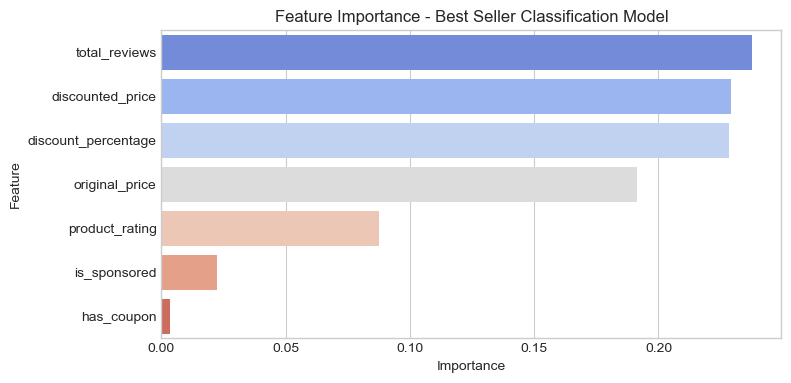

,Feature,Importance
4,total_reviews,0.237598
0,discounted_price,0.229102
2,discount_percentage,0.228203
1,original_price,0.191308
3,product_rating,0.087720
6,is_sponsored,0.022559
5,has_coupon,0.003510


In [12]:
# ============================================
#  STEP 5b: CLASSIFICATION MODEL
# Goal: Predict if a product is a "Best Seller"
# ============================================

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1️ Select relevant features
features_class = ['discounted_price', 'original_price', 'discount_percentage',
                  'product_rating', 'total_reviews', 'has_coupon', 'is_sponsored']

target = 'is_best_seller'

# 2️ Prepare data (drop rows with missing target)
df_class = df.dropna(subset=[target])

X = df_class[features_class]
y = df_class[target]

# 3️ Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4️ Train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 5️ Predictions
y_pred = clf.predict(X_test)

# 6️ Evaluate performance
acc = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(acc, 3))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 7️ Feature importance
importances_clf = pd.DataFrame({
    'Feature': features_class,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 8️ Visualize feature importance
plt.figure(figsize=(8,4))
sns.barplot(data=importances_clf, x='Importance', y='Feature', palette='coolwarm')
plt.title('Feature Importance - Best Seller Classification Model')
plt.show()

importances_clf


Interpretation:
The model confirms that customer engagement (reviews) and competitive pricing (discounts and low prices) are the strongest drivers of Best Seller status.
High-rated but expensive items or low-visibility products are less likely to become Best Sellers.

usiness Summary

The classification model shows that social validation and affordability are the key factors behind Best Seller products.
For amazon, this means that:

Promoting products with many reviews can increase conversion.

Offering moderate discounts and maintaining good price positioning helps new items reach Best Seller status faster.

“Best Seller” tagging could be combined with review-based recommendations to identify potential future top performers.

# Project Overview

In this project, I analyzed Amazon Electronics Product Sales data (42K+ items) to understand the key factors influencing sales performance and product success.
The analysis included Exploratory Data Analysis (EDA), business insights, and machine learning models for both sales prediction and Best Seller classification.

# Key Insights

# Pricing & Discounts

Most products are priced below CHF 500, with small discounts (10–20%) being the most common.

Products with moderate discounts (10–20%) achieved the highest average monthly sales, confirming that balanced discounting is more effective than deep price cuts.

# Coupons & Tags

Products marked as “Best Seller” sold 5× more on average than normal items, clear proof of social proof influence.

Coupons alone had limited effect on sales, suggesting they’re mostly used for less popular products.

# Category Insights

Power & Batteries dominate total sales and ratings, everyday essentials with consistent demand.

Wearables, Speakers, and Cameras received the highest customer ratings, showing potential for increased promotion or bundling opportunities.

# Machine Learning Findings

A Random Forest Regressor predicted monthly sales with an R² of 0.90, confirming that customer engagement and pricing features explain most of the sales variance.

The Best Seller Classification Model achieved 97% accuracy, identifying total reviews, discounted price, and discount percentage as the strongest predictors of Best Seller status.

# Business Recommendations for Interdiscount

1. Focus on Customer Engagement:
Encourage product reviews and ratings. Items with more reviews consistently drive higher sales and have a higher chance of becoming Best Sellers.

2. Optimize Discount Strategy:
Maintain moderate discounts (10–20%), these maximize sales without harming margins. Extreme discounts (>50%) have little additional effect.

3. Highlight Social Proof:
Prominently feature “Best Seller” or “Top Rated” badges on products, they have a major positive impact on conversion.

4. Promote High-Rating Categories:
Boost visibility of Wearables, Speakers, and Cameras, which show strong customer satisfaction but moderate sales, they have high growth potential.

5. Combine Data & Marketing:
Use predictive models (like the ones built here) to flag new products likely to become Best Sellers based on early reviews and pricing patterns.

# Closing Summary

This project demonstrates how data-driven insights can guide pricing, marketing, and product visibility strategies.
By combining EDA, machine learning, and business reasoning, we can help retailers like Interdiscount identify what drives performance, predict future success, and make smarter, evidence-based decisions.
